<a href="https://colab.research.google.com/github/drica-monteiro/intro_estat/blob/main/clt_confint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

First, we need to recap the Central Limit Theorem. Essentialy, this result guarantees that empirical means have distribution approximately normal. Formally, take $(X_i)_{i\in\mathbb{N}}$ and iid sequence of random variance with finite mean $\mu$ and varianca $\sigma^2$. Let $\bar{X_n}=n^{-1}\sum_{i=1}^nX_i$ be the empirical mean. Then
$$\frac{\sqrt{n}(\bar{X_n}-\mu)}{\sigma}\to \mathcal{N}(0,1).$$

In [ ]:
sample_size = 10000

<Axes: ylabel='Count'>

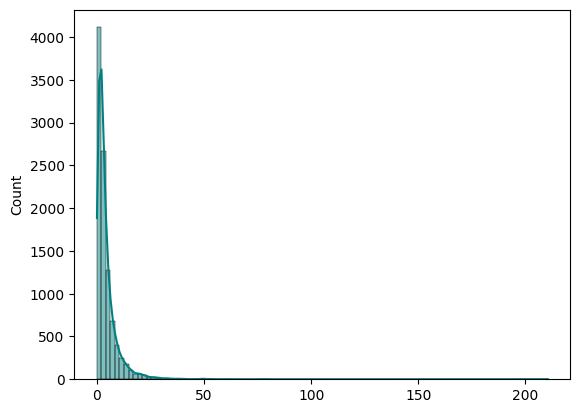

In [ ]:
#generate samples from original disitribution
sample_lognor = np.random.lognormal(mean=1, sigma=1,size = sample_size)
sns.histplot(sample_lognor, bins=100, kde=True, color='teal')

<Axes: ylabel='Count'>

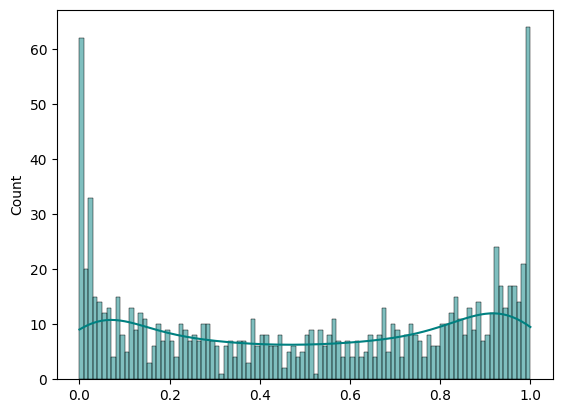

In [ ]:
a = 0.5
b = 0.5
sample_size = 1000
sample_beta = np.random.beta(a, b, size = sample_size)
sns.histplot(sample_beta, bins=100, kde=True, color='teal')

Now let us see the CLT in action!

<Axes: ylabel='Count'>

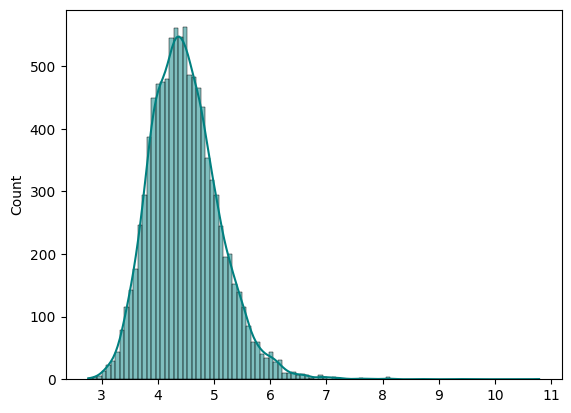

In [ ]:
#generate samples from sample mean

sample_means_lognor = []

for _ in range(10000):
    sample_lognor = np.random.lognormal(mean=1, sigma=1,size = sample_size)
    sample = np.random.choice(sample_lognor, size=100)  # sample size = 50
    sample_means_lognor.append(np.mean(sample))
sns.histplot(sample_means_lognor, bins=100, kde=True, color='teal')

<Axes: ylabel='Count'>

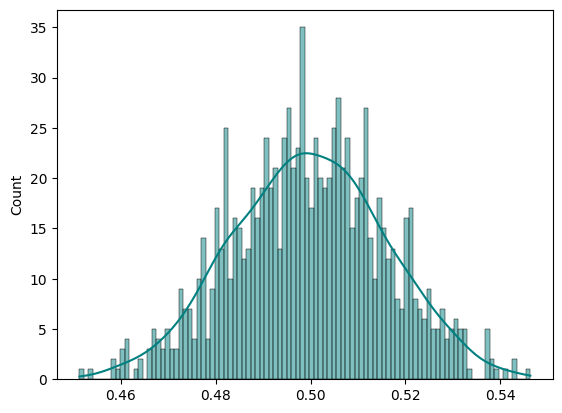

In [ ]:
#generate samples from sample mean

sample_means_beta = []

for _ in range(1000):
    sample_beta = np.random.beta(a, b, size = sample_size)
    sample = np.random.choice(sample_beta, size=1000)  # sample size = 50
    sample_means_beta.append(np.mean(sample))
sns.histplot(sample_means_beta, bins=100, kde=True, color='teal')

Confidence interval

Now that we know how the CLT acts in the sample mean distribution, we are going to construct a Confidence Interval for it. Let $\hat{\theta_n}$ be the sample mean estimator of the true mean $\theta$. By the CLT, $\hat{\theta_n}$ is asymptotically normal $\mathcal{N}(\theta, \sigma^2/n)$. Then, a CI $C_n$ for $\hat{\theta_n}$ is
$$C_n = (\hat{\theta_n}-z_{\alpha/2}\sigma/\sqrt{n}, \hat{\theta_n}+z_{\alpha/2}\sigma/\sqrt{n})$$
where $z_{\alpha/2} = \Phi^{-1}(1-\alpha/2)$.

In [ ]:
alpha = 0.05 #confidence parameter
z = stats.norm.ppf(1-alpha/2) #compute the inverse of cdf of a normal

In [ ]:
def conf_int(sample, n_int, sample_size, alpha):
  sample = np.random.beta(a, b, size = 10000)
  sample_emp = np.random.choice(sample, size=sample_size)  # sample size = 50
  emp_mean = np.mean(sample_emp)
  se = np.std(sample_emp)
  z = stats.norm.ppf(1-alpha/2)
  ci_lower = emp_mean - z*(se / np.sqrt(sample_size))
  ci_upper = emp_mean + z*(se / np.sqrt(sample_size))
  conf_int = (ci_lower, ci_upper)
  lenght = np.absolute(ci_upper-ci_lower)
  dict_info = {'ci':conf_int, 'empirical mean': emp_mean, 'lenght of CI': lenght}
  return dict_info

In [ ]:
n_int = 25
intervals = []
sample_means = []
sample_size = 50
alpha = 0.05
for _ in range(n_int):
    ci_info = conf_int(sample_beta, n_int, sample_size, alpha)
    confidence_interval = ci_info['ci']
    emp_mean = ci_info['empirical mean']
    sample_means.append(emp_mean)
    intervals.append(confidence_interval)

In [ ]:
lenghts = [np.absolute(top-bot) for top,bot in intervals]
max_lenght = max(lenghts)
print(max_lenght)

0.2085307860904413


In [ ]:
true_mean_beta = a/(a+b)

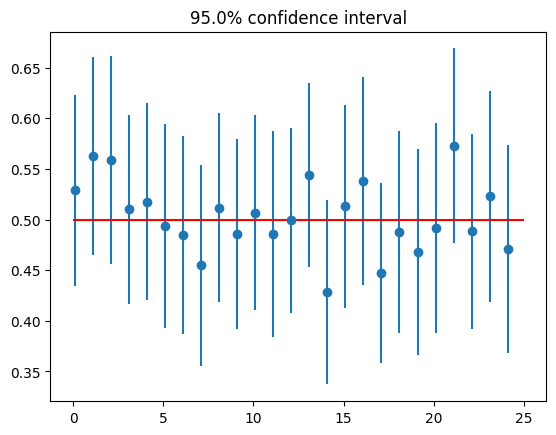

In [ ]:
plt.figure()

plt.errorbar(x=np.arange(0.1, n_int, 1), y=sample_means, yerr=[np.absolute(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=n_int, y=true_mean_beta, linewidth=1.5, color="red")
plt.title(f"{(1-alpha)*100}% confidence interval")
plt.show()

How the confidence level affects the lenght of CI?

In [ ]:
np.linspace?

In [ ]:
np.linspace(0.01, 0.05, num = 10)

array([0.01      , 0.01444444, 0.01888889, 0.02333333, 0.02777778,
       0.03222222, 0.03666667, 0.04111111, 0.04555556, 0.05      ])

In [ ]:
n_int = 25
alphas = np.linspace(0.01, 0.05, num = 10)
ci_len = []
sample_size = 50
for alpha in alphas:
    ci_info = conf_int(sample_beta, n_int, sample_size, alpha)
    confidence_interval = ci_info['ci']
    lenght = ci_info['lenght of CI']
    ci_len.append(lenght)

In [ ]:
confidence_levels = [(1-alpha)*100 for alpha in alphas]

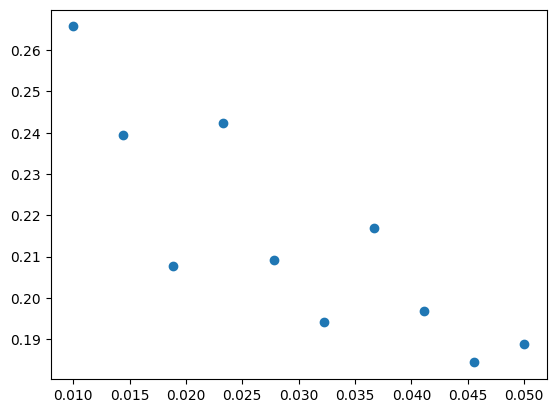

In [ ]:
plt.scatter(alphas, ci_len)
plt.show()